# Spotify Track Classification 

In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
dataset = pd.read_csv('dataset.csv')
dataset.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [4]:
dataset.shape

(114000, 21)

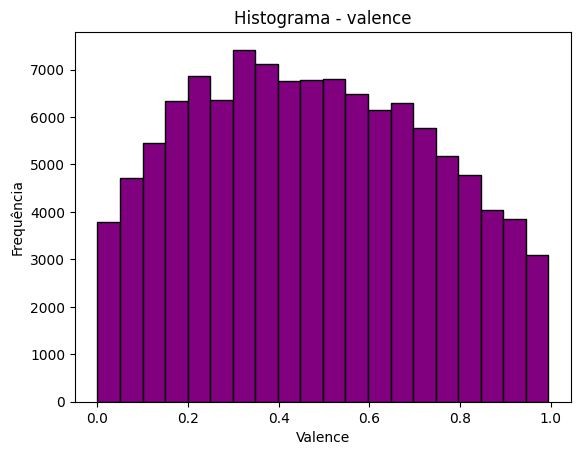

In [5]:
# criação de um histograma para analisar a frequencia dos dados

plt.hist(dataset['valence'], bins = 20, color = 'purple', edgecolor = 'black')
plt.xlabel('Valence')
plt.ylabel('Frequência')
plt.title('Histograma - valence')
plt.show()

### Creating the target variable 🎯
Analysing the data, the valence column is a measure of 0 and 1 that describe the positivity of the music. Those with high valence corresponds to the "fast song", while those with low valence corresponds to the "slow song". In the creation of the target variable, this information will be taken into account for the creation of our predictive model. 

In [6]:
# criando a função que separa as músicas entre lentas e ráídas

def categorizar_valence(row):
    if row['valence'] > 0.5:
        return 'fast'
    else:
        return 'slow'
    
# criando a tabela - target - 
dataset['target'] = dataset.apply(categorizar_valence, axis = 1)
dataset.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,fast
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,slow
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,slow
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,slow
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,slow
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,fast
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,slow
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,fast
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,fast
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,slow


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [8]:
dataset.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
target              0
dtype: int64

Exist null values in the dataset. They are not relevant, so they can be drop.

In [9]:
dataset = dataset.dropna(how="any", axis=0)
dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,fast
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,slow
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,slow
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,slow
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,slow


In [10]:
# verification 
dataset.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
target              0
dtype: int64

> For the classification, some columns will not be used, so they can be drop.

In [11]:
dataset_music = dataset.drop(['Unnamed: 0', 'track_id'], axis=1)
dataset_music.head(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,fast
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,slow
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,slow
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,slow
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,slow
5,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,fast
6,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,slow
7,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,fast
8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,fast
9,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,slow


### Categorical to Numerical
For the classification, we need numerical values, so we'll be use Label Enconer. 

**LabelEncoder:** It's  a simple efficient technique that maps each category to a unique number values 

In [12]:
def label_encoder_dataframe(df, columns_to_encode):
    le = LabelEncoder()

    for column in columns_to_encode:
        if column in df.columns:
            df[column] = le.fit_transform(df[column])
        else:
            print('The list has columns that do not exist in the DataFrame.')

    return df

columns_to_encode = ['artists', 'album_name', 'track_name', 'explicit', 'track_genre', 'target']
label_encoder_dataframe(dataset_music, columns_to_encode)
dataset_music.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


## Heatmap
For better understand the data, we need to see their correlations using heatmap. 

<Axes: >

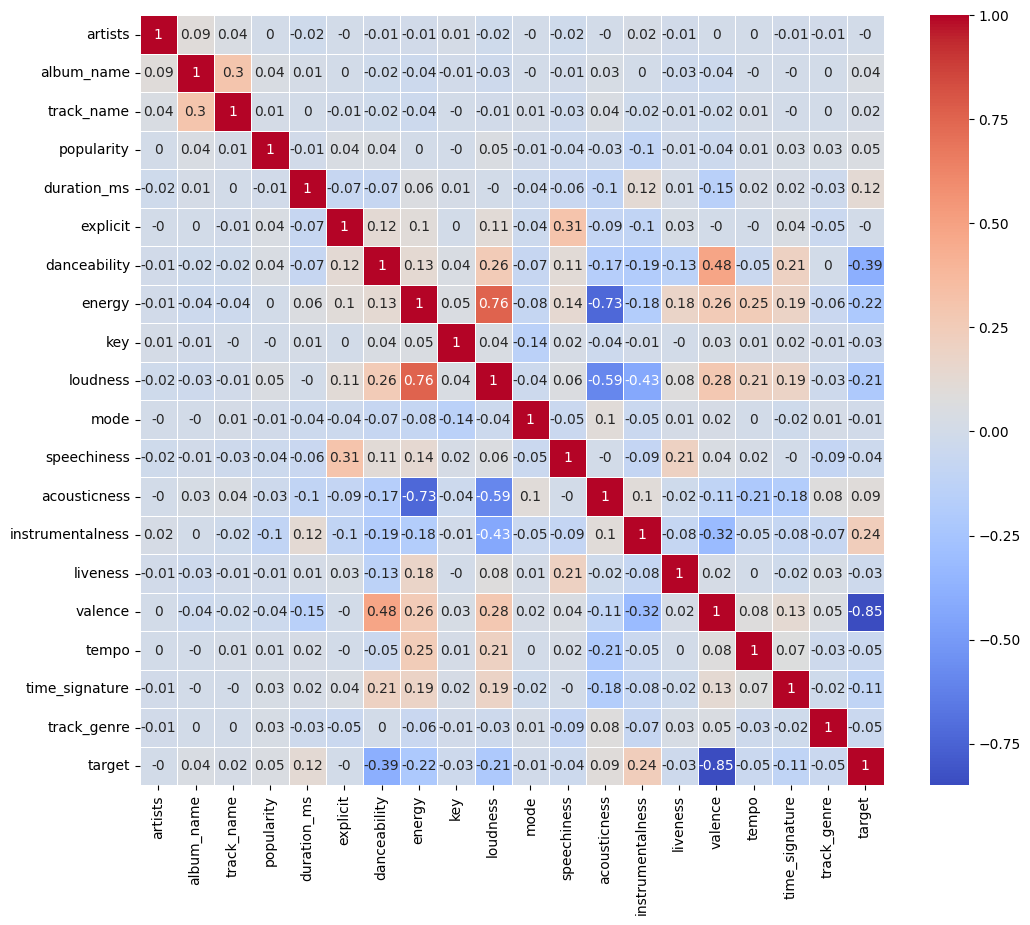

In [13]:
df_corr = dataset_music.corr().round(2)
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data = df_corr, annot = True, linewidths=.5, ax=ax, cmap='coolwarm' )

The correlations between the variables are not very strong. However, taking into consideration the target variable, the strongest correlation is with the valence column, which has a negative strong correlation.

In [14]:
# The balance of target column
round(dataset_music['target'].value_counts(normalize=True)*100,2)

target
1    54.37
0    45.63
Name: proportion, dtype: float64

The values are in a positive balance. 

1 - slow song

0 - fast song

## The test and the train of the Data 

In [15]:
# the columns that will be used 
x = dataset_music[['popularity', 'loudness', 'danceability', 'energy', 'acousticness', 'instrumentalness','liveness', 'track_genre']]
y = dataset_music['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)

In [16]:
print(x_train.shape, x_test.shape)

(91199, 8) (22800, 8)


## Normalizing the Data 
By applying MinMaxScaler all the values will be tranformade interval to a between 0 or 1 

In [26]:
# Normalize the Data 
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [18]:
# Function to execute the model of Machine Learning 
def run_model(model):
    
    model.fit(x_train_escalonado, y_train)
    prob_predic = model.predict_proba(x_test_escalonado)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    prediction = model.predict(x_test_escalonado)
    print("\n Classification Report")
    print(classification_report(y_test, prediction))

    print("\n Roc Curve \n")
    y_pred_probs = model.predict_proba(x_test_escalonado)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    auc = roc_auc_score(y_test, y_pred_probs)

    plt.figure(figsize = (8,6))
    plt.plot(fpr, tpr, color = 'purple', label = f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0,1], [0,1], color='black', linestyle = '--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    y_pred = (y_pred_probs > 0.5).astype(int)

### Logistic Regression 

AUC 0.7921020123824738

 Classification Report
              precision    recall  f1-score   support

           0       0.69      0.69      0.69     10403
           1       0.74      0.74      0.74     12397

    accuracy                           0.72     22800
   macro avg       0.72      0.72      0.72     22800
weighted avg       0.72      0.72      0.72     22800


 Roc Curve 



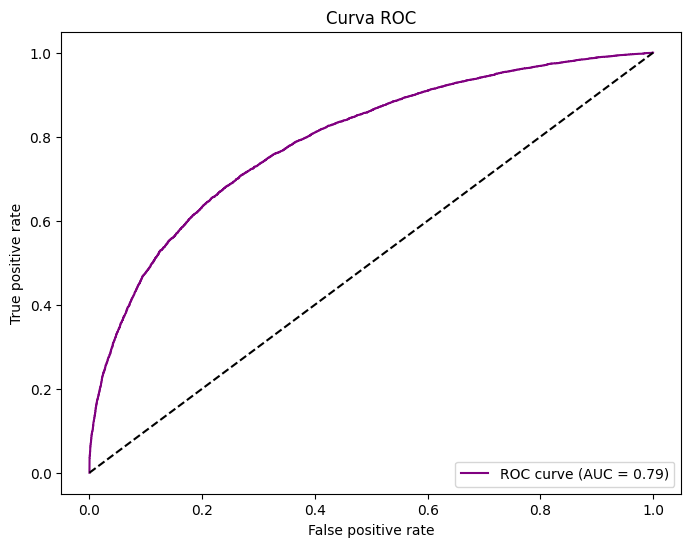

In [19]:
modelo_logistico = LogisticRegression()
run_model(modelo_logistico)

### KNN (K-Nearest Neughbors)


AUC 0.8097420815383802

 Classification Report
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     10403
           1       0.76      0.78      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.75      0.75      0.75     22800
weighted avg       0.75      0.75      0.75     22800


 Roc Curve 



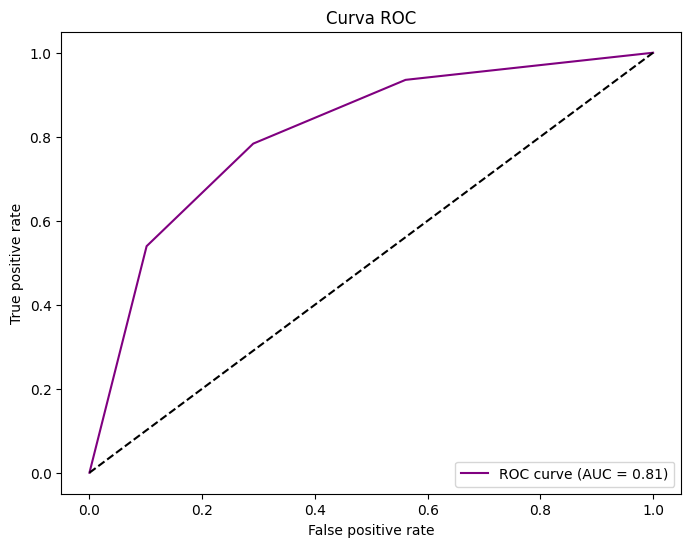

In [20]:
modelo_knn = KNeighborsClassifier(n_neighbors=3)
run_model(modelo_knn) 

### Random Florest 

AUC 0.8185659775994742

 Classification Report
              precision    recall  f1-score   support

           0       0.72      0.69      0.71     10403
           1       0.75      0.77      0.76     12397

    accuracy                           0.74     22800
   macro avg       0.74      0.73      0.73     22800
weighted avg       0.74      0.74      0.74     22800


 Roc Curve 



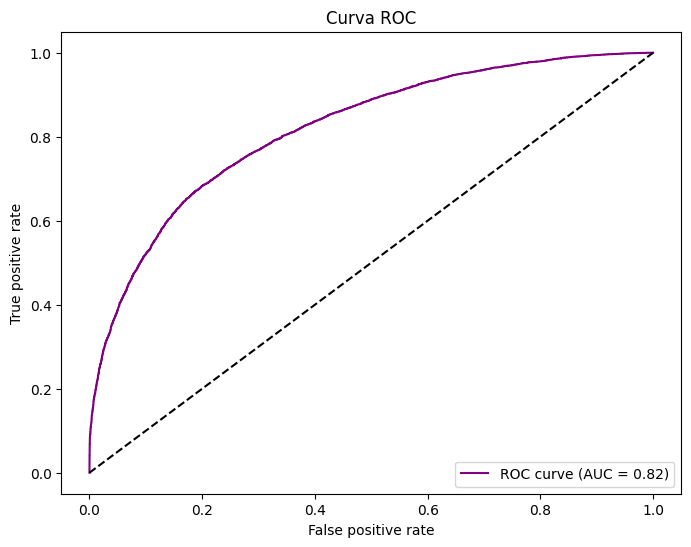

In [21]:
modeo_random_florest = RandomForestClassifier(max_depth=7, n_estimators=100)
run_model(modeo_random_florest)

#### GridSearchCV

In [22]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)
grid_search.fit(x_train_escalonado, y_train)
rf_params = grid_search.best_params_
print("Best hyperparameters:", rf_params)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 200}


AUC 0.892513236299638

 Classification Report
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     10403
           1       0.82      0.83      0.83     12397

    accuracy                           0.81     22800
   macro avg       0.81      0.81      0.81     22800
weighted avg       0.81      0.81      0.81     22800


 Roc Curve 



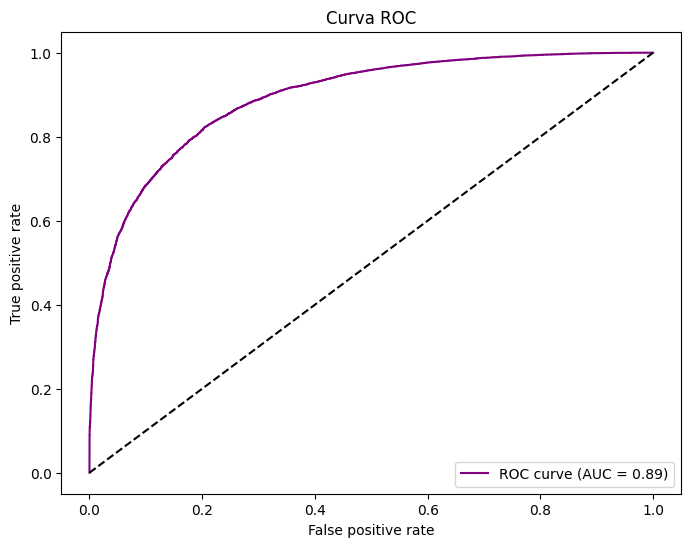

In [23]:
modeo_random_florest_rg = RandomForestClassifier(max_depth=15, n_estimators=300)
run_model(modeo_random_florest_rg)

## Testing the Classification Model

In [27]:
new_dada = pd.read_excel("new_dataset.xlsx")
original_base = pd.read_excel("new_dataset.xlsx")

#Creating the pipeline
colmn = ['track_genre']
label_encoder_dataframe(new_dada, colmn)
new_dada = scaler.transform(new_dada)

# Performing the prediction using the trained Random Florest Model
forecast = modeo_random_florest_rg.predict(new_dada)

# Getting the prediction
def map_value(values):
    results = []
    for valor in values:
        if valor == 0:
            results.append('Fast Song')
        elif valor == 1:
            results.append('Slow Song')
        else:
            results.append('Unknown')
    return np.array(results)

original_base['target'] = map_value(forecast)
original_base.head()

,popularity,loudness,danceability,energy,acousticness,instrumentalness,liveness,track_genre,target
0,80,-19333,0.89,0.80,0.0555,0.9760,0.45,rock,Fast Song
1,30,-19333,0.20,0.50,0.0100,0.4520,0.20,folk,Slow Song
2,60,-19333,0.70,0.70,0.0455,0.8650,0.50,pop,Slow Song
3,78,-67644,0.80,0.62,0.2066,0.0734,0.10,pop,Fast Song
4,20,-12453,0.10,0.20,0.3075,0.8674,0.12,MPB,Slow Song
